### preprocessing


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

In [2]:
# importing the datasets
training_set = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
training_set.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
training_set = training_set.iloc[:,1:2].values

In [6]:
training_set

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       ..., 
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

In [8]:
# feature scaling
#normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [9]:
training_set = sc.fit_transform(training_set)

In [11]:
training_set

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

In [12]:
# gettings imputs and outputs
x_train = training_set[0:1257]
y_train = training_set[1:1258]

In [16]:
pd.DataFrame(x_train).head()

,0
0,0.085814
1,0.097012
2,0.094334
3,0.091562
4,0.079842


In [17]:
pd.DataFrame(y_train).head()

,0
0,0.097012
1,0.094334
2,0.091562
3,0.079842
4,0.064328


In [19]:
#reshaping
x_train = np.reshape(x_train,(1257, 1, 1))

In [23]:
x_train

array([[[ 0.08581368]],

       [[ 0.09701243]],

       [[ 0.09433366]],

       ..., 
       [[ 0.95163331]],

       [[ 0.95725128]],

       [[ 0.93796041]]])

# building the RNN

In [24]:
# importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [25]:
# initializing the RNN
# regression model brcoz it is continous outcome
regressor = Sequential()

In [27]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4 , activation = 'sigmoid' , input_shape = (None , 1)))


In [28]:
# Adding the output layer
regressor.add(Dense(units = 1 ))

In [30]:
# Compiling the RNN
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [31]:
# Fitting the RNN to the Training set
regressor.fit(x_train , y_train , batch_size=32 , epochs= 200)

Epoch 1/200
1257/1257 [==============================] - 4s 3ms/step - loss: 0.5660
Epoch 2/200
1257/1257 [==============================] - 0s 95us/step - loss: 0.4325
Epoch 3/200
1257/1257 [==============================] - 0s 102us/step - loss: 0.3276
Epoch 4/200
1257/1257 [==============================] - 0s 107us/step - loss: 0.2468
Epoch 5/200
1257/1257 [==============================] - 0s 101us/step - loss: 0.1875
Epoch 6/200
1257/1257 [==============================] - 0s 101us/step - loss: 0.1441
Epoch 7/200
1257/1257 [==============================] - 0s 102us/step - loss: 0.1136
Epoch 8/200
1257/1257 [==============================] - 0s 109us/step - loss: 0.0931
Epoch 9/200
1257/1257 [==============================] - 0s 107us/step - loss: 0.0798
Epoch 10/200
1257/1257 [==============================] - 0s 111us/step - loss: 0.0715
Epoch 11/200
1257/1257 [==============================] - 0s 114us/step - loss: 0.0664
Epoch 12/200
1257/1257 [==============================]

1257/1257 [==============================] - 0s 107us/step - loss: 3.4296e-04
Epoch 95/200
1257/1257 [==============================] - 0s 124us/step - loss: 3.2963e-04
Epoch 96/200
1257/1257 [==============================] - 0s 111us/step - loss: 3.1839e-04
Epoch 97/200
1257/1257 [==============================] - 0s 107us/step - loss: 3.1052e-04
Epoch 98/200
1257/1257 [==============================] - 0s 114us/step - loss: 3.0259e-04
Epoch 99/200
1257/1257 [==============================] - 0s 108us/step - loss: 2.9639e-04
Epoch 100/200
1257/1257 [==============================] - 0s 109us/step - loss: 2.9177e-04
Epoch 101/200
1257/1257 [==============================] - 0s 112us/step - loss: 2.8890e-04
Epoch 102/200
1257/1257 [==============================] - 0s 109us/step - loss: 2.8639e-04
Epoch 103/200
1257/1257 [==============================] - 0s 111us/step - loss: 2.8340e-04
Epoch 104/200
1257/1257 [==============================] - 0s 121us/step - loss: 2.8102e-04
Epoch 1

1257/1257 [==============================] - 0s 121us/step - loss: 2.5354e-04
Epoch 183/200
1257/1257 [==============================] - 0s 128us/step - loss: 2.5380e-04
Epoch 184/200
1257/1257 [==============================] - 0s 152us/step - loss: 2.5542e-04
Epoch 185/200
1257/1257 [==============================] - 0s 130us/step - loss: 2.5165e-04
Epoch 186/200
1257/1257 [==============================] - 0s 119us/step - loss: 2.5274e-04
Epoch 187/200
1257/1257 [==============================] - 0s 122us/step - loss: 2.5249e-04
Epoch 188/200
1257/1257 [==============================] - 0s 117us/step - loss: 2.5509e-04
Epoch 189/200
1257/1257 [==============================] - 0s 114us/step - loss: 2.5180e-04
Epoch 190/200
1257/1257 [==============================] - 0s 119us/step - loss: 2.5538e-04
Epoch 191/200
1257/1257 [==============================] - 0s 115us/step - loss: 2.5442e-04
Epoch 192/200
1257/1257 [==============================] - 0s 120us/step - loss: 2.5194e-04
Ep

# Making the predictions and visualising the results

In [32]:
# Creating the real stock price of 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [33]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)

In [34]:
# converting 2D inputs into 3D
inputs =  np.reshape(inputs,(20, 1, 1))

In [35]:
inputs.shape

(20, 1, 1)

In [36]:
# predictions
predicted_stock_price = regressor.predict(inputs)

In [37]:
predicted_stock_price

array([[ 0.92898196],
       [ 0.94514978],
       [ 0.94129312],
       [ 0.95680916],
       [ 0.97096694],
       [ 0.97250688],
       [ 0.96948904],
       [ 0.9717477 ],
       [ 0.97210634],
       [ 0.97168446],
       [ 0.97034431],
       [ 0.96961594],
       [ 0.97150499],
       [ 0.97186369],
       [ 0.98768246],
       [ 0.99533677],
       [ 1.00387061],
       [ 1.00064421],
       [ 0.97966605],
       [ 0.95951033]], dtype=float32)

In [38]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [39]:
predicted_stock_price

array([[ 778.50354004],
       [ 787.19470215],
       [ 785.121521  ],
       [ 793.46228027],
       [ 801.07293701],
       [ 801.90075684],
       [ 800.27850342],
       [ 801.49267578],
       [ 801.68548584],
       [ 801.4586792 ],
       [ 800.73828125],
       [ 800.34674072],
       [ 801.36224365],
       [ 801.55505371],
       [ 810.05853271],
       [ 814.17321777],
       [ 818.76068115],
       [ 817.02624512],
       [ 805.74926758],
       [ 794.91436768]], dtype=float32)

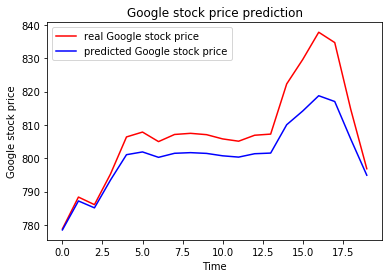

In [40]:
#Visualising the results
plt.plot(real_stock_price ,color = 'red', label = 'real Google stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'predicted Google stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()